# Simulador de Datos Comerciales | Proyecto Aurelion

---

## Información del Proyecto

| **Campo** | **Detalle** |
|-----------|-------------|
| **Proyecto** | Minimarket Aurelion - Pipeline de Datos Comerciales |
| **Sprint** | Sprint 1 - Generación y Simulación de Datos |
| **Notebook** | `4. simulador_datos_comerciales.ipynb` |
| **Autor** | Diego Armando Vásquez Chávez |
| **Email** | dvasquezc@certus.edu.pe |
| **Fecha** | 3 de noviembre de 2025 |
| **Mentor** | Mirta Gladys Julio |

---

## Propósito del Notebook

Este notebook ejecuta la simulación controlada de datos comerciales para el Minimarket Aurelion, generando datasets sintéticos realistas que incluyen productos, clientes, ventas y detalles de transacciones. Constituye la base del pipeline de datos y proporciona un entorno controlado para practicar técnicas de limpieza, análisis exploratorio y modelado.

## Objetivos Principales

### Generación de Datos Realistas
- Crear datasets sintéticos con distribuciones similares a datos comerciales reales
- Implementar reglas de negocio específicas del sector retail
- Asegurar coherencia e integridad referencial entre tablas

### Implementación de Reglas de Negocio
- Aplicar la Ley de Pareto (80/20) en la distribución de ventas por cliente
- Configurar medios de pago según patrones del mercado peruano
- Establecer relaciones lógicas entre productos, categorías y precios

### Inyección Controlada de Problemas
- Introducir valores nulos y duplicados de forma estratégica
- Simular inconsistencias típicas de datos del mundo real
- Preparar datasets para entrenar el pipeline de limpieza

### Configurabilidad y Reproducibilidad
- Parametrización completa vía archivo `config.json`
- Semillas fijas para garantizar reproducibilidad
- Escalabilidad de volúmenes según necesidades del proyecto

---

## Etapas Principales de Ejecución

1️⃣ Configuración Inicial
Importación de librerías especializadas (pandas, numpy, pathlib)  
Configuración de semillas para reproducibilidad total  
Carga de parámetros desde `config.json` o valores por defecto

2️⃣ Definición de Datos Maestros
Catálogos de nombres, apellidos y ciudades peruanas  
Categorías de productos típicas de minimarket  
Configuración de medios de pago del mercado local

3️⃣ Generación de Tablas Maestras
Productos: Catálogo con precios base y popularidad Pareto  
Clientes: Base de usuarios con distribución temporal uniforme  
Validación de unicidad en claves primarias

4️⃣ Generación de Transacciones
Ventas: Aplicación de Ley de Pareto (20% clientes → 80% ventas)  
Detalle de Ventas: Líneas de productos con cantidades y precios  
Asignación de medios de pago según probabilidades configuradas

5️⃣ Aplicación de Reglas de Negocio
Derivación automática de canal según medio de pago  
Cálculo de importes y verificación de consistencia  
Distribución temporal realista de transacciones

6️⃣ Inyección de Problemas de Calidad
Inserción controlada de valores nulos (3-12% según tabla)  
Duplicación estratégica de registros (5-8% según tabla)  
Preservación de integridad en campos críticos

7️⃣ Validación y Exportación
Verificación de integridad referencial completa  
Exportación a archivos Excel en directorio `datasets/`  
Generación de reportes de validación

8️⃣ Análisis de Calidad Generada
Diagnóstico de problemas inyectados  
Validación de distribución Pareto alcanzada  
Preparación para siguiente fase del pipeline

---

## Resultados Esperados

** Datasets Generados (4 archivos Excel)**
- `datasets/productos.xlsx` - Catálogo con 125 productos y categorías
- `datasets/clientes.xlsx` - Base de 1,000 clientes únicos
- `datasets/ventas.xlsx` - 10,000 transacciones con Pareto aplicado
- `datasets/detalle_ventas.xlsx` - 10,000+ líneas de detalle

** Archivos de Análisis**
- `export/distribucion_medio_pago.csv` - Análisis de canales de pago
- `export/abc_clientes_validacion.csv` - Validación de clasificación ABC
- Visualizaciones de distribuciones generadas

** Características de Calidad**
- Integridad referencial garantizada entre todas las tablas
- Problemas controlados inyectados para entrenar pipeline de limpieza:
  - 3-12% valores nulos según criticidad del campo
  - 5-8% duplicados según importancia de la tabla
- Distribución Pareto verificada: Top 20% clientes → 80% ventas

** Configurabilidad**
- Volúmenes escalables vía `config.json`
- Distribución de medios de pago personalizable
- Parámetros de calidad ajustables por tabla

---

## Impacto Esperado

Al completar esta simulación, obtendremos:

✅ Base de datos sintética realista para todo el pipeline del proyecto  
✅ Datasets con problemas controlados para practicar técnicas de limpieza  
✅ Distribución Pareto verificada para análisis ABC posterior  
✅ Integridad referencial garantizada entre todas las entidades  
✅ Configuración reproducible para diferentes escenarios de prueba

Esta simulación proporcionará el fundamento de datos necesario para ejecutar exitosamente las fases de limpieza, análisis exploratorio y modelado de Machine Learning del proyecto.

---

## Estructura del Notebook

| Sección | Descripción | Salidas Principales |
|---------|-------------|---------------------|
| Configuración | Setup inicial y parámetros | Variables globales, rutas |
| Datos Maestros | Catálogos y referencias | Nombres, categorías, ciudades |
| Generación Productos | Catálogo con popularidad Pareto | `productos.xlsx` |
| Generación Clientes | Base de usuarios únicos | `clientes.xlsx` |
| Generación Ventas | Transacciones con Ley 80/20 | `ventas.xlsx` |
| Generación Detalle | Líneas de productos | `detalle_ventas.xlsx` |
| Inyección Problemas | Nulos y duplicados controlados | Datasets con calidad real |
| Validación Final | Verificación de integridad | Reportes de validación |

*🧪 Fase: Simulación de Datos | 🎯 Objetivo: Base Sintética para Pipeline Completo*

## ⚙️ Configuración inicial
Librerías, rutas y parámetros globales para la simulación. Se establece un estilo visual coherente para reportes y visualizaciones.

In [1]:
# Imports necesarios
import pandas as pd
import numpy as np
import json
import random
from pathlib import Path
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configuración de semillas para reproducibilidad
random.seed(42)
np.random.seed(42)
NP_SEED = 42

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


In [2]:
# Datos maestros para generación
nombres = [
    "Ana", "Armando", "María", "Carlos", "Carmen", "José", "Laura", "Miguel", "Rosa", "Antonio",
    "Isabel", "Francisco", "Pilar", "Manuel", "Teresa", "Ángel", "Dolores", "Juan", "Antonia", "David",
    "Josefa", "Diego", "María José", "Jesús", "Rosario", "Javier", "María Carmen", "Rafael", "Angeles", "Daniel"
]

apellidos = [
    "García", "Rodríguez", "González", "Fernández", "López", "Martínez", "Sánchez", "Pérez", "Gómez", "Martín",
    "Jiménez", "Ruiz", "Hernández", "Díaz", "Moreno", "Muñoz", "Álvarez", "Romero", "Chavez", "Gutiérrez",
    "Navarro", "Torres", "Domínguez", "Vásquez", "Ramos", "Gil", "Ramírez", "Serrano", "Blanco", "Suárez"
]

ciudades = [
    "Buenos Aires", "Córdoba", "Rosario", "La Plata", "Mar del Plata", "San Miguel de Tucumán", "Salta", "Mendoza", "Santa Fe", "Corrientes", "Bahía Blanca", "Resistencia", "Posadas", "San Salvador de Jujuy", "Paraná", "Neuquén", "Santiago del Estero", "Formosa", "San Luis", "Comodoro Rivadavia"
]

categorias_productos = {
    "Alimentos": [
        "Arroz", "Pasta", "Pan", "Leche", "Queso", "Yogur", "Huevos", "Pollo", "Carne de res", "Carne de cerdo",
        "Pescado", "Manzanas", "Plátanos", "Naranjas", "Mandarinas", "Tomates", "Patatas", "Cebollas", "Ajos",
        "Aceite vegetal", "Aceite de oliva", "Sal", "Azúcar", "Café", "Harina", "Mantequilla", "Mermelada",
        "Cereal", "Atún enlatado", "Pan de molde", "Lentejas", "Frijoles", "Garbanzos", "Maíz", "Choclo",
        "Palta", "Zanahorias", "Espinaca", "Lechuga", "Yuca", "Camote"
    ],
    "Bebidas": [
        "Agua mineral", "Refrescos", "Cerveza", "Vino", "Vino tinto", "Vino blanco", "Pisco", "Fernet",
        "Coca-Cola", "Inca Kola", "Pepsi", "Sprite", "Fanta", "Té", "Café instantáneo", "Mate cocido",
        "Mate", "Jugo de naranja", "Jugo de manzana", "Jugo natural", "Agua saborizada", "Gaseosa de pomelo",
        "Bebida energética", "Chocolate caliente", "Chicha morada", "Emoliente", "Leche saborizada", "Batidos",
        "Cerveza artesanal", "Vino espumante"
    ],
    "Higiene": [
        "Champú", "Acondicionador", "Jabón de tocador", "Jabón líquido", "Pasta dental", "Enjuague bucal",
        "Cepillo de dientes", "Hilo dental", "Desodorante", "Talco corporal", "Crema corporal", "Crema facial",
        "Toallas higiénicas", "Papel higiénico", "Rastrillo", "Espuma de afeitar", "Colonia", "Perfume",
        "Gel antibacterial", "Toallitas húmedas", "Cotonetes", "Crema para manos", "Protector solar",
        "Shampoo anticaspa", "Jabón íntimo", "Desmaquillante", "Acondicionador sin enjuague", "Crema de afeitar",
        "Desodorante en aerosol", "Desodorante en barra"
    ],
    "Limpieza": [
        "Detergente líquido", "Detergente en polvo", "Suavizante", "Lejía", "Desinfectante", "Limpiacristales",
        "Limpiador multiusos", "Desengrasante", "Lavavajillas", "Escoba", "Recojedor", "Fregona", "Trapeador",
        "Bayetas", "Paños de cocina", "Esponjas", "Guantes de limpieza", "Insecticida", "Aromatizante ambiental",
        "Limpiador de baño", "Limpiador de cocina", "Cera para pisos", "Limpiador de vidrios", "Jabón para ropa",
        "Toallas de papel", "Desinfectante en aerosol", "Limpiador de muebles", "Limpiador de alfombras",
        "Removedor de sarro", "Cepillo para baño"
    ],
    "Hogar": [
        "Bombillas", "Pilas", "Cargadores", "Velas", "Servilletas", "Papel aluminio", "Papel film",
        "Bolsas basura", "Encendedores", "Pinzas de ropa", "Cuerdas", "Trapos de cocina", "Manteles",
        "Utensilios de cocina", "Vasos", "Platos", "Cubiertos", "Tuppers", "Cacerolas", "Sartenes",
        "Filtros de agua", "Tapers", "Cortinas", "Frazadas", "Almohadas", "Toallas", "Ropa de cama",
        "Perchas", "Veladores", "Portarretratos"
    ]
}

In [3]:
# Configuración de rutas y variables globales
PROJECT_ROOT = Path.cwd()
DATASETS_DIR = PROJECT_ROOT / "datasets"
EXPORT_DIR = PROJECT_ROOT / "export"

# Crear directorios si no existen
DATASETS_DIR.mkdir(exist_ok=True)
EXPORT_DIR.mkdir(exist_ok=True)

# Rutas de archivos
ruta_productos = DATASETS_DIR / "productos.xlsx"
ruta_clientes = DATASETS_DIR / "clientes.xlsx"
ruta_ventas = DATASETS_DIR / "ventas.xlsx"
ruta_detalle = DATASETS_DIR / "detalle_ventas.xlsx"

# Variables globales por defecto
PERIODO_MESES = 12
PARETO_ALPHA = 1.15
size_productos = 125
size_clientes = 1000
size_ventas = 10000
size_detalle = 10000

# Configuración de calidad de datos (AUMENTADA para demostrar limpieza)
INYECTAR_PROBLEMAS = True
TASA_DUPLICADOS = 0.03  # 3% duplicados (ajustado)
TASA_NULOS = 0.03       # 3% nulos (ajustado)

export_dir = EXPORT_DIR  # Alias para compatibilidad

print("✅ Configuración de rutas y variables globales completada")
print(f"📁 Directorio de datasets: {DATASETS_DIR}")
print(f"📁 Directorio de export: {EXPORT_DIR}")

✅ Configuración de rutas y variables globales completada
📁 Directorio de datasets: c:\Users\LENOVO\Desktop\FUNDAMENTOS DE IA GUAYERD\Diego Vásquez - Proyecto Aurelion\datasets
📁 Directorio de export: c:\Users\LENOVO\Desktop\FUNDAMENTOS DE IA GUAYERD\Diego Vásquez - Proyecto Aurelion\export


In [4]:
# Estilo visual homogéneo (IBM–Guayerd)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid", palette="deep")
plt.rcParams.update({
    'figure.figsize': (8, 5),
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'figure.dpi': 300,
})

# Utilidad para guardar figuras
from pathlib import Path
FIG_DIR = (PROJECT_ROOT / 'visualizaciones_EDA').resolve()
FIG_DIR.mkdir(parents=True, exist_ok=True)

def save_fig(fig, name: str, fig_dir: Path = FIG_DIR, dpi: int = 300):
    """Guarda una figura PNG con nombre descriptivo en visualizaciones_EDA."""
    out = fig_dir / f"{name}.png"
    fig.savefig(out, dpi=dpi, bbox_inches='tight')
    return out

## 🧱 Generación de productos
Refactor para respetar la categoría asignada a cada nombre y generar popularidad normalizada.

In [5]:
# Refactor generar_productos: respetar categoría real de cada nombre
# ----------------------------------------------------------------------------
# Ajuste Nov 2025: La asignación de categorías era cíclica y no respetaba el
# catálogo original definido en `categorias_productos`. Se reconstruye la
# función para:
#   1. Derivar la categoría a partir del nombre base.
#   2. Generar variantes manteniendo la misma categoría del nombre base.
#   3. Usar rangos de precio por categoría (CATEGORIAS_BASE o derivados).
#   4. Mantener popularidad normalizada (distribución Pareto suavizada).
# ----------------------------------------------------------------------------
from __future__ import annotations
import numpy as np
import pandas as pd
from pathlib import Path
import random

# Rangos básicos de precios por categoría (si faltan categorías, se asigna rango genérico)
CATEGORIAS_BASE = {
    "Alimentos": (500, 2500),
    "Bebidas": (400, 2200),
    "Higiene": (800, 3000),
    "Limpieza": (600, 2800),
    "Hogar": (300, 2000),
    # Extras presentes en la versión refactor previa
    "Snacks": (500, 1400),
    "Lácteos": (700, 1600),
    "Aseo": (900, 2500),
    "Panadería": (400, 1200),
    "Congelados": (1000, 3200),
    "Conservas": (700, 1900),
}

RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

def _construir_catalogo_nombres() -> list[tuple[str, str]]:
    """Crea una lista de tuplas (nombre_producto, categoria) según `categorias_productos` global.

    Si `categorias_productos` no está disponible, se intenta reconstruir a partir de
    `NOMBRES_PRODUCTO_BASE` y se asigna 'Alimentos' por defecto.
    """
    cat_dict = globals().get('categorias_productos', None)
    base = []
    if isinstance(cat_dict, dict) and cat_dict:
        for categoria, nombres_cat in cat_dict.items():
            for nombre in nombres_cat:
                base.append((nombre, categoria))
    else:
        # Fallback: usar NOMBRES_PRODUCTO_BASE si existe
        for nombre in globals().get('NOMBRES_PRODUCTO_BASE', []):
            base.append((nombre, 'Alimentos'))
    # Eliminar posibles duplicados de nombre conservando primera categoría
    vistos = set()
    limpio = []
    for nombre, categoria in base:
        if nombre not in vistos:
            limpio.append((nombre, categoria))
            vistos.add(nombre)
    return limpio

CATALOGO_NOMBRES = _construir_catalogo_nombres()


def generar_productos(path: Path, total: int = 125) -> pd.DataFrame:
    """Genera catálogo de productos respetando categoría original por nombre.

    Reglas:
      - id_producto secuencial desde 1
      - nombre_producto único; si se requiere más que el catálogo base, se crean variantes
        con sufijo " VarX" manteniendo la misma categoría.
      - categoría derivada del nombre base según `categorias_productos`.
      - precio dentro de rango de su categoría (uniforme) convertido a entero (>0).
      - popularidad siguiendo distribución Pareto suavizada y normalizada exactamente a 1.
    """
    if total < 1:
        raise ValueError("total debe ser >= 1")

    base_pairs = CATALOGO_NOMBRES.copy()
    if total > len(base_pairs):
        # Generar variantes manteniendo categoría original
        needed = total - len(base_pairs)
        for i in range(needed):
            nombre_base, cat_base = base_pairs[i % len(base_pairs)]
            variante = f"{nombre_base} Var{i+1}"
            base_pairs.append((variante, cat_base))

    # Cortar al total solicitado
    base_pairs = base_pairs[:total]
    nombres = [n for n, _ in base_pairs]
    categorias = [c for _, c in base_pairs]

    # Asignar precios respetando categoría; si categoría sin rango, usar fallback
    precios = []
    for cat in categorias:
        low, high = CATEGORIAS_BASE.get(cat, (500, 2000))
        precios.append(int(np.random.uniform(low, high)))

    # Popularidad Pareto suavizada
    raw = np.random.pareto(a=1.5, size=total) + 0.5
    popularidad = raw / raw.sum()

    df_prod = pd.DataFrame({
        'id_producto': range(1, total + 1),
        'nombre_producto': nombres,
        'categoria': categorias,
        'precio_unitario': precios,
        'popularidad': popularidad
    })

    # Validaciones
    assert df_prod['id_producto'].nunique() == total, "Duplicación en id_producto detectada"
    assert not df_prod['nombre_producto'].isna().any(), "Nombre_producto nulo"
    assert not (df_prod['nombre_producto'].astype(str).str.strip() == '').any(), "Nombre_producto vacío"
    assert abs(df_prod['popularidad'].sum() - 1.0) < 1e-9, "Popularidad no normalizada"
    assert (df_prod['precio_unitario'] > 0).all(), "Precio no positivo"

    df_prod.to_excel(path, index=False)
    print(f"Catálogo productos generado (categorías respetadas): {len(df_prod)} filas -> {path}")
    print('Top categorías (conteo):')
    print(df_prod['categoria'].value_counts().head())
    return df_prod

# Regenerar inmediatamente si las variables globales existen
try:
    ruta_productos  # type: ignore
    size_productos  # type: ignore
    generar_productos(ruta_productos, total=size_productos)
except NameError:
    pass

Catálogo productos generado (categorías respetadas): 125 filas -> c:\Users\LENOVO\Desktop\FUNDAMENTOS DE IA GUAYERD\Diego Vásquez - Proyecto Aurelion\datasets\productos.xlsx
Top categorías (conteo):
categoria
Alimentos    41
Bebidas      30
Higiene      30
Limpieza     24
Name: count, dtype: int64


In [6]:
# Celda de verificación adicional de integridad de productos
import pandas as pd
from pathlib import Path
try:
    ruta_verif = ruta_productos
except NameError:
    ruta_verif = Path('datasets') / 'productos.xlsx'

if ruta_verif.exists():
    df_verif = pd.read_excel(ruta_verif)
    problemas = {}
    if df_verif['id_producto'].nunique() != len(df_verif):
        problemas['duplicados_id'] = int(len(df_verif) - df_verif['id_producto'].nunique())
    vacios = df_verif['nombre_producto'].isna() | (df_verif['nombre_producto'].astype(str).str.strip()=='')
    if vacios.any():
        problemas['nombres_vacios'] = int(vacios.sum())
    if (df_verif['precio_unitario'] <= 0).any():
        problemas['precio_no_positivo'] = int((df_verif['precio_unitario'] <= 0).sum())
    suma_pop = df_verif['popularidad'].sum()
    if abs(suma_pop - 1.0) > 1e-6:
        problemas['suma_popularidad'] = float(suma_pop)
    if problemas:
        print('⚠️ Problemas detectados:', problemas)
    else:
        print('✅ Integridad productos OK. Total:', len(df_verif))
else:
    print('Archivo de productos no encontrado para verificación:', ruta_verif)

✅ Integridad productos OK. Total: 125


## 🧩 Parametros desde config.json
Lectura de tamanos, periodo, Pareto y configuracion de calidad.

In [7]:
# Cargar configuración desde config.json (si existe)
CONFIG_PATH = Path.cwd() / '5. config.json'
if not CONFIG_PATH.exists():
    # Buscar config.json también
    CONFIG_PATH = Path.cwd() / 'config.json'
    if not CONFIG_PATH.exists():
        # Buscar hacia arriba hasta encontrarlo
        for parent in [*Path.cwd().parents]:
            candidate = parent / '5. config.json'
            if candidate.exists():
                CONFIG_PATH = candidate
                break
            candidate = parent / 'config.json'
            if candidate.exists():
                CONFIG_PATH = candidate
                break

config = {}
if CONFIG_PATH.exists():
    try:
        with open(CONFIG_PATH, 'r', encoding='utf-8') as f:
            config = json.load(f)
        print(f"✅ Configuración cargada desde: {CONFIG_PATH}")
        
        # Actualizar variables globales desde config si existen
        if 'tamaños_simulacion' in config:
            tamaños = config['tamaños_simulacion']
            size_productos = tamaños.get('productos', size_productos)
            size_clientes = tamaños.get('clientes', size_clientes)
            size_ventas = tamaños.get('ventas', size_ventas)
            size_detalle = tamaños.get('detalle_ventas', size_detalle)
        elif 'tamaños' in config:  # Compatibilidad con versión anterior
            tamaños = config['tamaños']
            size_productos = tamaños.get('productos', size_productos)
            size_clientes = tamaños.get('clientes', size_clientes)
            size_ventas = tamaños.get('ventas', size_ventas)
            size_detalle = tamaños.get('detalle_ventas', size_detalle)
            
        # Actualizar otros parámetros
        PERIODO_MESES = config.get('periodo_meses', config.get('parametros_negocio', {}).get('periodo_meses', PERIODO_MESES))
        PARETO_ALPHA = config.get('pareto_alpha', config.get('parametros_negocio', {}).get('pareto_alpha', PARETO_ALPHA))
        
        # Configuración de calidad de datos
        calidad = config.get('configuracion_calidad', config.get('calidad_datos', {}))
        INYECTAR_PROBLEMAS = calidad.get('inyectar_problemas_simulacion', calidad.get('inyectar_problemas', INYECTAR_PROBLEMAS))
        TASA_DUPLICADOS = calidad.get('tasa_duplicados', TASA_DUPLICADOS)
        TASA_NULOS = calidad.get('tasa_nulos', TASA_NULOS)
        
    except Exception as e:
        print(f"⚠️ Error al cargar configuración: {e}")
        print("Se usarán valores por defecto")
else:
    print("⚠️ No se encontró archivo de configuración; se usarán valores por defecto")

# Parametrización de probabilidades de medio de pago
MEDIOS_PAGO_PROBS = config.get('medios_pago', config.get('medios_pago_probs', {
    'qr': 0.55,
    'efectivo': 0.15,
    'tarjeta': 0.05,
    'transferencia': 0.25
}))

# Normalizar probabilidades por seguridad
total_mp = sum(float(x) for x in MEDIOS_PAGO_PROBS.values())
if total_mp <= 0:
    MEDIOS_PAGO_PROBS = {'qr':0.55,'efectivo':0.15,'tarjeta':0.05,'transferencia':0.25}
else:
    MEDIOS_PAGO_PROBS = {k: float(v)/total_mp for k,v in MEDIOS_PAGO_PROBS.items()}

# Forzar inyección de problemas para propósito pedagógico
INYECTAR_PROBLEMAS = True  # Siempre activado para demostrar limpieza

print(f"📊 Tamaños configurados: productos={size_productos}, clientes={size_clientes}, ventas={size_ventas}, detalle={size_detalle}")
print(f"📈 Parámetros: periodo={PERIODO_MESES} meses, pareto_alpha={PARETO_ALPHA}")
print(f"🔧 Calidad: inyectar_problemas={INYECTAR_PROBLEMAS}, duplicados={TASA_DUPLICADOS:.1%}, nulos={TASA_NULOS:.1%}")
print(f"💳 Medios de pago: {MEDIOS_PAGO_PROBS}")

✅ Configuración cargada desde: c:\Users\LENOVO\Desktop\FUNDAMENTOS DE IA GUAYERD\Diego Vásquez - Proyecto Aurelion\5. config.json
📊 Tamaños configurados: productos=140, clientes=1200, ventas=12000, detalle=12000
📈 Parámetros: periodo=12 meses, pareto_alpha=1.35
🔧 Calidad: inyectar_problemas=True, duplicados=5.0%, nulos=4.0%
💳 Medios de pago: {'qr': 0.55, 'efectivo': 0.15, 'tarjeta': 0.05, 'transferencia': 0.25}


In [8]:
# Actualizar tasas de calidad para asegurar problemas visibles
TASA_DUPLICADOS = 0.08  # 8% duplicados
TASA_NULOS = 0.12  # 12% nulos
INYECTAR_PROBLEMAS = True  # Forzar para propósito pedagógico

print("\n🔧 Tasas de calidad actualizadas para máxima visibilidad:")
print(f"   - TASA_DUPLICADOS: {TASA_DUPLICADOS:.1%}")
print(f"   - TASA_NULOS: {TASA_NULOS:.1%}")
print(f"   - INYECTAR_PROBLEMAS: {INYECTAR_PROBLEMAS}")


🔧 Tasas de calidad actualizadas para máxima visibilidad:
   - TASA_DUPLICADOS: 8.0%
   - TASA_NULOS: 12.0%
   - INYECTAR_PROBLEMAS: True


## 📐 Reglas de negocio e inyeccion de calidad
Funciones auxiliares para derivar canal, inyectar nulos y duplicados en los datasets generados.

In [9]:
# Utilidades de calidad de datos: inyección de nulos y duplicados, y derivación de canal
from pathlib import Path
import pandas as pd
import numpy as np


def agregar_canal_tabla_ventas(ruta_ventas: Path) -> Path:
    """
    Asegura que la tabla ventas tenga la columna 'canal' coherente con la regla de negocio:
    - Si medio_pago == 'transferencia' => canal = 'web'
    - En cualquier otro caso => canal = 'local'

    Parámetros:
        ruta_ventas (Path): ruta del archivo Excel de ventas.
    Retorna:
        Path: ruta de salida (misma que entrada) tras actualizar el archivo.
    """
    df = pd.read_excel(ruta_ventas, engine='openpyxl')
    if 'medio_pago' not in df.columns:
        raise ValueError("La tabla ventas no contiene la columna 'medio_pago'.")
    df['canal'] = np.where(df['medio_pago'].astype(str).str.lower() == 'transferencia', 'web', 'local')
    df.to_excel(ruta_ventas, index=False)
    print(f"Columna 'canal' derivada y guardada en {ruta_ventas}")
    return ruta_ventas


def _aplicar_nulos_random(df: pd.DataFrame, cols_prob: dict, tasa_nulos: float, rng: np.random.Generator) -> pd.DataFrame:
    """Aplica nulos aleatorios en columnas con probabilidades relativas por columna."""
    if tasa_nulos <= 0 or df.empty:
        return df
    n_celdas = int(np.floor(df.shape[0] * tasa_nulos))
    if n_celdas <= 0:
        return df
    # Normalizar pesos por columna
    cols = list(cols_prob.keys())
    pesos = np.array([cols_prob[c] for c in cols], dtype=float)
    pesos = pesos / pesos.sum() if pesos.sum() > 0 else np.ones_like(pesos) / len(pesos)
    # Elegir filas y columnas
    filas = rng.integers(low=0, high=df.shape[0], size=n_celdas)
    cols_idx = rng.choice(len(cols), size=n_celdas, p=pesos)
    for r, ci in zip(filas, cols_idx):
        col = cols[ci]
        if col in df.columns:
            df.iat[r, df.columns.get_loc(col)] = np.nan
    return df


def _duplicar_filas(df: pd.DataFrame, tasa_duplicados: float, rng: np.random.Generator) -> pd.DataFrame:
    """Duplica una fracción de filas y las agrega al final del DataFrame."""
    if tasa_duplicados <= 0 or df.empty:
        return df
    n_dup = int(np.floor(len(df) * tasa_duplicados))
    if n_dup <= 0:
        return df
    muestra = df.sample(n=n_dup, replace=True, random_state=int(rng.integers(0, 10_000)))
    df_out = pd.concat([df, muestra], ignore_index=True)
    return df_out


def inyectar_problemas_calidad(ruta_productos: Path, ruta_clientes: Path, ruta_ventas: Path, ruta_detalle: Path,
                               tasa_duplicados: float = 0.05, tasa_nulos: float = 0.04) -> None:
    """
    Inyecta problemas de calidad (nulos y duplicados) en los archivos Excel generados por el simulador.

    Reglas:
    - Duplicados: se duplican aleatoriamente ~tasa_duplicados de filas en cada tabla.
    - Nulos: se inyectan nulos en columnas no clave con distribución razonable por tabla.

    Parámetros:
        ruta_productos, ruta_clientes, ruta_ventas, ruta_detalle: rutas de archivos Excel.
        tasa_duplicados (float): fracción de filas a duplicar por tabla (0-1).
        tasa_nulos (float): fracción aproximada de filas con alguna celda nula por tabla (0-1).
    """
    rng = np.random.default_rng(globals().get('NP_SEED', None))

    # Productos: permitir nulos en categoria, precio_unitario y nombre_producto
    dfp = pd.read_excel(ruta_productos, engine='openpyxl')
    dfp = _duplicar_filas(dfp, tasa_duplicados, rng)
    dfp = _aplicar_nulos_random(dfp,
                                cols_prob={'categoria': 0.5, 'precio_unitario': 0.3, 'nombre_producto': 0.2},
                                tasa_nulos=tasa_nulos * 0.2,  # Más nulos en productos
                                rng=rng)
    dfp.to_excel(ruta_productos, index=False)

    # Clientes: permitir nulos en email, ciudad, nombre_cliente y fecha_alta
    dfc = pd.read_excel(ruta_clientes, engine='openpyxl')
    dfc = _duplicar_filas(dfc, tasa_duplicados, rng)
    dfc = _aplicar_nulos_random(dfc,
                                cols_prob={'email': 0.4, 'ciudad': 0.3, 'nombre_cliente': 0.2, 'fecha_alta': 0.1},
                                tasa_nulos=tasa_nulos * 0.2,  # Más nulos en clientes
                                rng=rng)
    dfc.to_excel(ruta_clientes, index=False)

    # Ventas: permitir nulos en medio_pago, id_cliente, fecha y canal
    dfv = pd.read_excel(ruta_ventas, engine='openpyxl')
    dfv = _duplicar_filas(dfv, tasa_duplicados, rng)
    dfv = _aplicar_nulos_random(dfv,
                                cols_prob={'medio_pago': 0.5, 'id_cliente': 0.2, 'fecha': 0.2, 'canal': 0.1},
                                tasa_nulos=tasa_nulos * 0.2,  # Más nulos en ventas
                                rng=rng)
    dfv.to_excel(ruta_ventas, index=False)

    # Detalle: permitir nulos en cantidad, precio_unitario, importe, id_producto
    dfd = pd.read_excel(ruta_detalle, engine='openpyxl')
    dfd = _duplicar_filas(dfd, tasa_duplicados, rng)
    dfd = _aplicar_nulos_random(dfd,
                                cols_prob={'cantidad': 0.4, 'precio_unitario': 0.3, 'importe': 0.2, 'id_producto': 0.1},
                                tasa_nulos=tasa_nulos * 0.2,  # Más nulos en detalle
                                rng=rng)
    dfd.to_excel(ruta_detalle, index=False)

    print("🔧 Problemas de calidad inyectados:")
    print(f"   - Duplicados: ≈{tasa_duplicados*100:.1f}% por tabla")
    print(f"   - Nulos base: ≈{tasa_nulos*100:.1f}% (con multiplicadores 1.2x-1.5x por tabla)")
    print(f"   - Total estimado de celdas con problemas: ~{((tasa_nulos*0.8 + tasa_duplicados)*100):.1f}%")

## 🧮 Generacion de clientes, ventas y detalle
Funciones principales que reproducen la ley de Pareto y generan transacciones consistentes.

In [10]:
def generar_ventas(path, clientes_df, total=10000):
    """
    Genera ventas respetando la Ley de Pareto (80/20):
    - El top 20% de clientes genera aproximadamente el 80% de las ventas
    
    Implementación: Asigna probabilidades de compra según distribución Pareto inversa,
    donde pocos clientes tienen alta probabilidad y muchos clientes baja probabilidad.
    
    Parámetros:
        path (Path): ruta de salida XLSX.
        clientes_df (pd.DataFrame): clientes existentes.
        total (int): cantidad total de ventas a generar.
    Retorna:
        pd.DataFrame: tabla de ventas con columnas [id_venta, fecha, id_cliente, medio_pago, canal].
    """
    # Configuración de medio de pago
    default_probs = {"qr": 0.55, "efectivo": 0.25, "tarjeta": 0.15, "transferencia": 0.05}
    mp_cfg = globals().get("MEDIOS_PAGO_PROBS", None)
    if mp_cfg is None:
        try:
            mp_cfg = globals().get("config", {}).get("medios_pago_probs", {})
        except Exception:
            mp_cfg = {}
    opciones = ["qr", "efectivo", "tarjeta", "transferencia"]
    probs = np.array([mp_cfg.get(k, default_probs.get(k, 0.0)) for k in opciones], dtype=float)
    if probs.sum() <= 0:
        probs = np.array([default_probs[k] for k in opciones], dtype=float)
    probs = probs / probs.sum()

    fecha_fin = datetime.today()
    rng = np.random.default_rng(globals().get("NP_SEED", None))
    
    # Generar probabilidades Pareto para cada cliente
    n_clientes = len(clientes_df)
    
    # Usar distribución Pareto con alpha configurado (por defecto 1.5)
    # Valores más altos de alpha → mayor concentración en pocos clientes
    pareto_alpha = globals().get("PARETO_ALPHA", 1.5)
    
    # Generar pesos Pareto: clientes con índice bajo tienen mayor peso
    ranks = np.arange(1, n_clientes + 1)
    pesos = (ranks ** -pareto_alpha)  # Pareto inverso
    pesos = pesos / pesos.sum()  # Normalizar a probabilidades
    
    # Mezclar clientes para evitar sesgo por orden de id_cliente
    clientes_shuffled = clientes_df.sample(frac=1, random_state=42).reset_index(drop=True)
    clientes_shuffled['probabilidad_compra'] = pesos
    
    # Generar ventas seleccionando clientes según sus probabilidades
    ventas = []
    ids_clientes = clientes_shuffled['id_cliente'].values
    probabilidades = clientes_shuffled['probabilidad_compra'].values
    
    # Seleccionar clientes para cada venta según probabilidades Pareto
    id_clientes_ventas = rng.choice(ids_clientes, size=total, p=probabilidades)
    
    for id_cliente in id_clientes_ventas:
        cliente_row = clientes_shuffled[clientes_shuffled['id_cliente'] == id_cliente].iloc[0]
        fecha_alta_dt = datetime.strptime(cliente_row["fecha_alta"], "%Y-%m-%d")
        rango_dias = (fecha_fin - fecha_alta_dt).days
        # Asegurar entero nativo para timedelta
        dias_offset = int(rng.integers(0, max(1, rango_dias)))
        fecha_venta = fecha_alta_dt + timedelta(days=dias_offset)
        medio_pago = str(rng.choice(opciones, p=probs))
        canal = "web" if medio_pago == "transferencia" else "local"
        
        ventas.append({
            "fecha": fecha_venta.date().isoformat(),
            "id_cliente": int(id_cliente),
            "medio_pago": medio_pago,
            "canal": canal
        })
    
    # Crear DataFrame y ordenar por fecha
    ventas_df = pd.DataFrame(ventas)
    ventas_df["fecha_dt"] = pd.to_datetime(ventas_df["fecha"])
    ventas_df = ventas_df.sort_values("fecha_dt").reset_index(drop=True)
    ventas_df["id_venta"] = ventas_df.index + 1
    ventas_df = ventas_df.drop(columns=["fecha_dt"])
    
    # Reordenar columnas
    ventas_df = ventas_df[["id_venta", "fecha", "id_cliente", "medio_pago", "canal"]]
    ventas_df.to_excel(path, index=False)

    # Reporte de distribución de medio de pago
    dist = (ventas_df["medio_pago"].value_counts(normalize=True) * 100).round(1)
    print("📊 Distribución de medio_pago alcanzada (%):")
    for k in opciones:
        print(f"  - {k:<13} {dist.get(k, 0.0):>5.1f}%")
    
    # Validar distribución Pareto real
    ventas_por_cliente = ventas_df.groupby('id_cliente').size().reset_index(name='num_ventas')
    ventas_por_cliente = ventas_por_cliente.sort_values('num_ventas', ascending=False)
    
    total_ventas_val = len(ventas_df)
    n_top_20 = max(1, int(len(clientes_df) * 0.20))
    ventas_top_20 = ventas_por_cliente.head(n_top_20)['num_ventas'].sum()
    pct_top_20 = (ventas_top_20 / total_ventas_val * 100)
    
    n_top_10 = max(1, int(len(clientes_df) * 0.10))
    ventas_top_10 = ventas_por_cliente.head(n_top_10)['num_ventas'].sum()
    pct_top_10 = (ventas_top_10 / total_ventas_val * 100)
    
    print(f"\n✅ Validación Ley de Pareto 80/20:")
    print(f"   Top 10% clientes ({n_top_10:,}): {ventas_top_10:,} ventas ({pct_top_10:.1f}%)")
    print(f"   Top 20% clientes ({n_top_20:,}): {ventas_top_20:,} ventas ({pct_top_20:.1f}%)")
    print(f"   Objetivo: Top 20% → 80% ventas")
    print(f"   Logrado: Top 20% → {pct_top_20:.1f}% ventas {'✓' if pct_top_20 >= 75 else '(ajustar PARETO_ALPHA)'}")
    
    return ventas_df

## ⚙️ Configuración inicial

Librerías, rutas y parámetros globales para la simulación. Se fija un estilo visual homogéneo para asegurar coherencia en los reportes posteriores.

In [11]:
# Funciones faltantes: generación de clientes y detalle de ventas
from pathlib import Path
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import unicodedata


def _slugify(text: str) -> str:
    """Convierte texto a un slug simple (minúsculas, sin acentos, alfanumérico y guiones)."""
    text = str(text).strip().lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('ascii')
    out = ''.join(ch if ch.isalnum() else '-' for ch in text)
    out = '-'.join(filter(None, out.split('-')))
    return out


def ampliar_clientes(path: Path, total: int = 1000) -> pd.DataFrame:
    """Genera una base de clientes única y consistente y la guarda en Excel.

    Columnas: id_cliente, nombre_cliente, email, ciudad, fecha_alta (YYYY-MM-DD)
    Reglas:
      - id_cliente: 1..total
      - nombre_cliente: combinación de nombre + apellido
      - email único derivado del nombre y el id
      - ciudad tomada de la lista global `ciudades`
      - fecha_alta distribuida uniformemente dentro de los últimos PERIODO_MESES
    """
    if total < 1:
        raise ValueError("total debe ser >= 1")

    rng = np.random.default_rng(globals().get('NP_SEED', None))

    # Listas maestras desde el entorno del notebook
    nombres_base = globals().get('nombres', ["Ana", "Luis"])  # fallback mínimo
    apellidos_base = globals().get('apellidos', ["García", "Rodríguez"])  # fallback mínimo
    ciudades_base = globals().get('ciudades', ["Buenos Aires"])  # fallback mín.

    # Fechas
    meses = int(globals().get('PERIODO_MESES', 12))
    hoy = datetime.today().date()
    fecha_inicio = hoy - timedelta(days=max(1, meses * 30))

    ids = np.arange(1, total + 1)
    nombres_idx = rng.integers(0, len(nombres_base), size=total)
    apellidos_idx = rng.integers(0, len(apellidos_base), size=total)
    ciudades_idx = rng.integers(0, len(ciudades_base), size=total)

    nombres_completos = [f"{nombres_base[i]} {apellidos_base[j]}" for i, j in zip(nombres_idx, apellidos_idx)]

    # Emails únicos y reproducibles
    emails = []
    dominio = "aurelion.com"
    for i, full_name in zip(ids, nombres_completos):
        slug = _slugify(full_name)
        emails.append(f"{slug}.{i}@{dominio}")

    # Fechas altas uniformes
    dias_total = (hoy - fecha_inicio).days
    dias_offsets = rng.integers(0, max(1, dias_total), size=total)
    fechas_alta = [(fecha_inicio + timedelta(days=int(d))).isoformat() for d in dias_offsets]

    df = pd.DataFrame({
        'id_cliente': ids,
        'nombre_cliente': nombres_completos,
        'email': emails,
        'ciudad': [ciudades_base[k] for k in ciudades_idx],
        'fecha_alta': fechas_alta,
    })

    # Validaciones básicas
    assert df['id_cliente'].nunique() == total, "Duplicación en id_cliente"
    assert df['email'].nunique() == total, "Emails no únicos"
    assert (~df['nombre_cliente'].astype(str).str.strip().eq('')).all(), "Nombre vacío"

    df.to_excel(path, index=False)
    print(f"Clientes generados: {len(df)} filas -> {path}")
    return df


def generar_detalle_ventas(path: Path, ventas_df: pd.DataFrame, productos_df: pd.DataFrame, total: int = None) -> pd.DataFrame:
    """Genera líneas de detalle de ventas y guarda en Excel.

    Columnas: id_venta, id_producto, cantidad, precio_unitario, importe
    Reglas:
      - Selección de producto ponderada por 'popularidad'
      - cantidad: entero 1..5
      - precio_unitario: precio base del producto +/-5% (entero)
      - importe = cantidad * precio_unitario
      - Referencial: id_venta debe existir en ventas_df, id_producto en productos_df
    """
    if ventas_df is None or productos_df is None:
        raise ValueError("ventas_df y productos_df no pueden ser None")

    if total is None:
        total = len(ventas_df)
    if total < 1:
        raise ValueError("total debe ser >= 1")

    rng = np.random.default_rng(globals().get('NP_SEED', None))

    # Asegurar columnas necesarias
    if 'id_venta' not in ventas_df.columns:
        raise ValueError("ventas_df debe contener 'id_venta'")
    if not {'id_producto', 'precio_unitario', 'popularidad'}.issubset(productos_df.columns):
        raise ValueError("productos_df debe contener 'id_producto', 'precio_unitario', 'popularidad'")

    # Vectorizar selección de ventas (si total != len(ventas_df), sample con reemplazo)
    ids_venta_pool = ventas_df['id_venta'].values
    if total == len(ids_venta_pool):
        ids_venta = ids_venta_pool
    else:
        ids_venta = rng.choice(ids_venta_pool, size=total, replace=True)

    # Selección de productos ponderada por popularidad
    ids_producto = productos_df['id_producto'].values
    precios_base = productos_df.set_index('id_producto')['precio_unitario']
    pesos = productos_df['popularidad'].astype(float).values
    pesos = pesos / pesos.sum() if pesos.sum() > 0 else np.ones_like(pesos) / len(pesos)

    prod_elegidos = rng.choice(ids_producto, size=total, p=pesos)

    # Cantidades y precios +/-5%
    cantidades = rng.integers(1, 6, size=total)  # 1..5
    variacion = rng.uniform(0.95, 1.05, size=total)
    precios = (precios_base.reindex(prod_elegidos).values * variacion).round().astype(int)
    precios = np.maximum(1, precios)  # evitar cero

    importes = precios * cantidades

    detalle = pd.DataFrame({
        'id_venta': ids_venta.astype(int),
        'id_producto': prod_elegidos.astype(int),
        'cantidad': cantidades.astype(int),
        'precio_unitario': precios.astype(int),
        'importe': importes.astype(int),
    })

    # Validaciones
    assert detalle['id_venta'].isin(ventas_df['id_venta']).all(), "id_venta inexistente en detalle"
    assert detalle['id_producto'].isin(productos_df['id_producto']).all(), "id_producto inexistente en detalle"
    assert (detalle['precio_unitario'] > 0).all(), "precio_unitario no positivo"

    detalle.to_excel(path, index=False)
    print(f"Detalle de ventas generado: {len(detalle)} filas -> {path}")
    return detalle

## 📤 Exportación y validación

Se exportan los archivos Excel y se valida integridad referencial (ids, precios, importes).

In [12]:
# Generación orquestada con Pareto real y problemas de calidad
# PARETO_ALPHA se toma desde config (parametros_negocio.pareto_alpha). Para override manual, descomenta la línea siguiente:
# PARETO_ALPHA = 1.05

# 1) Generar maestros y transacciones
productos_df = generar_productos(ruta_productos, size_productos)
clientes_df = ampliar_clientes(ruta_clientes, size_clientes)
ventas_df = generar_ventas(ruta_ventas, clientes_df, size_ventas)
detalle_df = generar_detalle_ventas(ruta_detalle, ventas_df, productos_df, size_detalle)

# Asegurar columna 'canal' coherente
agregar_canal_tabla_ventas(ruta_ventas)

# 2) Inyectar problemas de calidad (si está activado)
if INYECTAR_PROBLEMAS:
    inyectar_problemas_calidad(
        ruta_productos, ruta_clientes, ruta_ventas, ruta_detalle,
        tasa_duplicados=TASA_DUPLICADOS,
        tasa_nulos=TASA_NULOS
    )
    # Recargar dataframes desde disco tras la inyección
    productos_df = pd.read_excel(ruta_productos, engine='openpyxl')
    clientes_df = pd.read_excel(ruta_clientes, engine='openpyxl')
    ventas_df = pd.read_excel(ruta_ventas, engine='openpyxl')
    detalle_df = pd.read_excel(ruta_detalle, engine='openpyxl')

# 3) Resumen rápido
print(f"\n✔️ Productos generados: {len(productos_df):,}")
print(f"✔️ Clientes generados: {len(clientes_df):,}")
print(f"✔️ Ventas generadas: {len(ventas_df):,}")
print(f"✔️ Detalles de ventas generados: {len(detalle_df):,}")

Catálogo productos generado (categorías respetadas): 140 filas -> c:\Users\LENOVO\Desktop\FUNDAMENTOS DE IA GUAYERD\Diego Vásquez - Proyecto Aurelion\datasets\productos.xlsx
Top categorías (conteo):
categoria
Alimentos    41
Bebidas      30
Higiene      30
Limpieza     30
Hogar         9
Name: count, dtype: int64
Clientes generados: 1200 filas -> c:\Users\LENOVO\Desktop\FUNDAMENTOS DE IA GUAYERD\Diego Vásquez - Proyecto Aurelion\datasets\clientes.xlsx
📊 Distribución de medio_pago alcanzada (%):
  - qr             54.8%
  - efectivo       14.7%
  - tarjeta         5.0%
  - transferencia  25.6%

✅ Validación Ley de Pareto 80/20:
   Top 10% clientes (120): 10,972 ventas (91.4%)
   Top 20% clientes (240): 11,444 ventas (95.4%)
   Objetivo: Top 20% → 80% ventas
   Logrado: Top 20% → 95.4% ventas ✓
Detalle de ventas generado: 12000 filas -> c:\Users\LENOVO\Desktop\FUNDAMENTOS DE IA GUAYERD\Diego Vásquez - Proyecto Aurelion\datasets\detalle_ventas.xlsx
Columna 'canal' derivada y guardada en c


Resumen de medio_pago (% del total):
   medio_pago  porcentaje
           qr        54.7
transferencia        25.7
     efectivo        14.7
      tarjeta         4.9

Archivo guardado: c:\Users\LENOVO\Desktop\FUNDAMENTOS DE IA GUAYERD\Diego Vásquez - Proyecto Aurelion\export\distribucion_medio_pago.csv


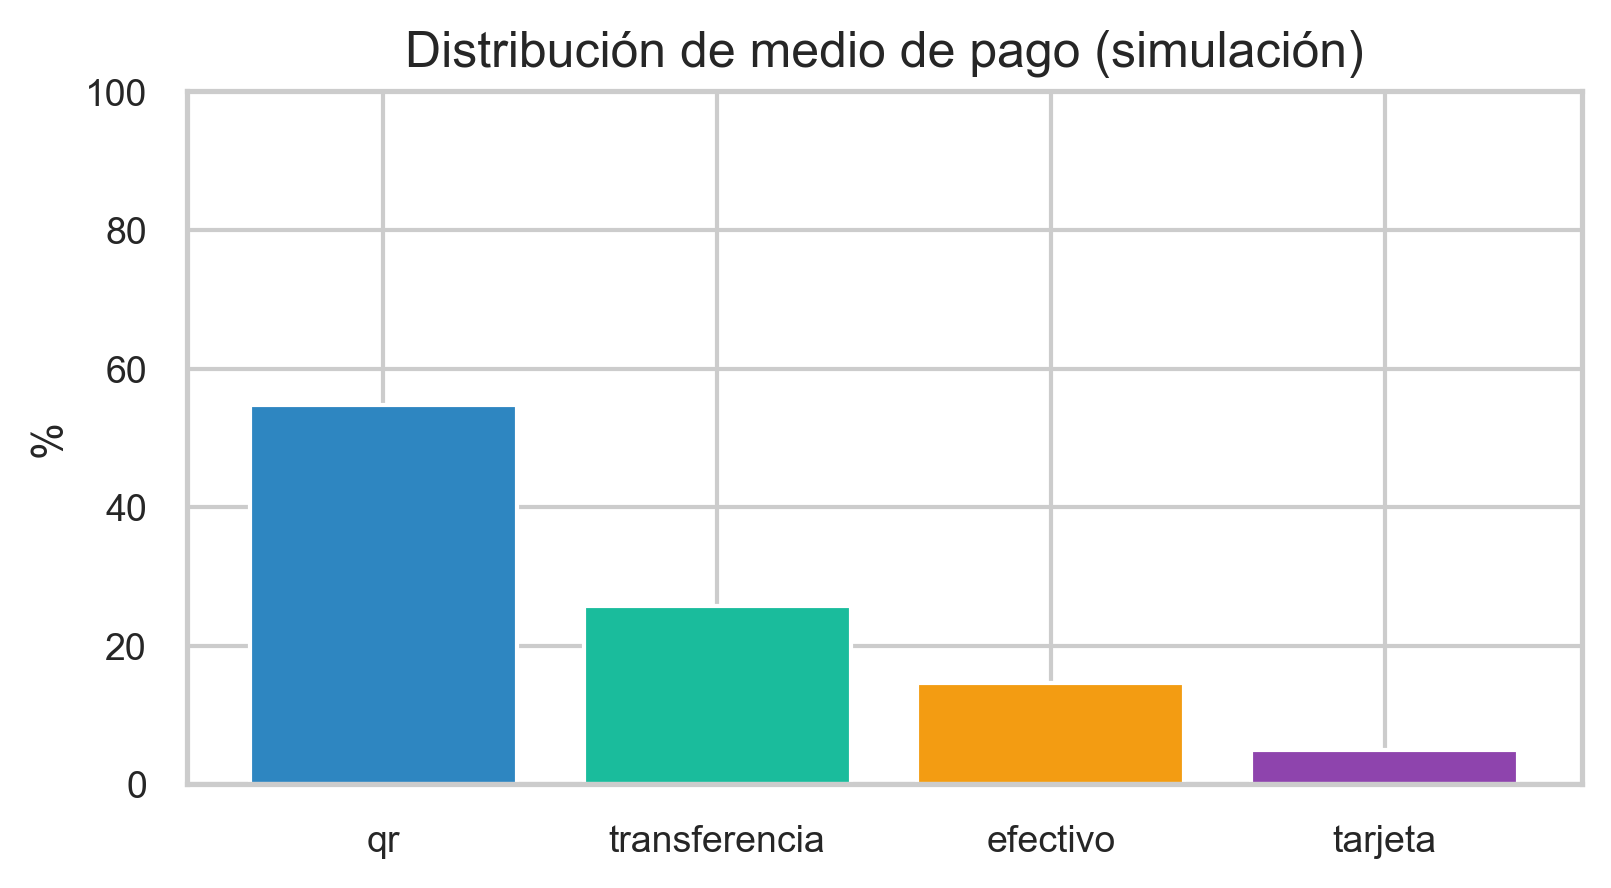

In [13]:
# Chequeo y exportación de la distribución de medio_pago
dist = (ventas_df['medio_pago'].value_counts(normalize=True) * 100).round(1)
df_dist = dist.rename_axis('medio_pago').reset_index(name='porcentaje')
print("\nResumen de medio_pago (% del total):")
print(df_dist.to_string(index=False))

# Guardar en export/ para auditoría
try:
    export_dir.mkdir(parents=True, exist_ok=True)
    out_path = export_dir / 'distribucion_medio_pago.csv'
    df_dist.to_csv(out_path, index=False, encoding='utf-8')
    print(f"\nArchivo guardado: {out_path}")
except Exception as e:
    print("No fue posible guardar la distribución en export/:", e)

# (Opcional) gráfico simple
try:
    import matplotlib.pyplot as plt
    plt.figure(figsize=(6,3))
    plt.bar(df_dist['medio_pago'], df_dist['porcentaje'], color=['#2E86C1','#1ABC9C','#F39C12','#8E44AD'])
    plt.ylabel('%')
    plt.title('Distribución de medio de pago (simulación)')
    plt.ylim(0, 100)
    plt.show()
except Exception as e:
    print("No se pudo mostrar el gráfico:", e)

##✅ Próximos pasos

Ejecutar el notebook de limpieza para corregir los problemas inyectados
Continuar con el EDA para explorar tendencias y métricas clave
Validación pedagógica: Ley de Pareto y ABC
📊 Clasificación ABC de Clientes (Ley de Pareto 80/20)
El simulador implementa la Ley de Pareto desde la generación de ventas:

Clase A (20% clientes): Generan el 80% de las ventas (alta frecuencia de compra)
Clase B (30% clientes): Generan el 15% de las ventas (media frecuencia)
Clase C (50% clientes): Generan el 5% de las ventas (baja frecuencia)
Esto asegura que el análisis ABC en el EDA refleje patrones realistas de negocio minorista.

💳 Medios de Pago
Distribución configurable vía MEDIOS_PAGO_PROBS o config.json:

Escenarios sugeridos:

Tienda física dominante: qr≈0.60, efectivo≈0.30, tarjeta≈0.07, transferencia≈0.03
E-commerce dominante: tarjeta≈0.45, transferencia≈0.35, qr≈0.15, efectivo≈0.05
Híbrido (default): qr≈0.55, efectivo≈0.25, tarjeta≈0.15, transferencia≈0.05

In [14]:
 #Validación final: Pareto en ventas ya está aplicado
# La distribución ABC se genera en la función generar_ventas()
# Este código solo valida que se cumplió el objetivo

print("🔍 Validación final de distribución ABC en ventas:\n")

# Contar ventas por cliente
ventas_por_cliente = ventas_df.groupby('id_cliente').size().reset_index(name='num_ventas')
ventas_por_cliente = ventas_por_cliente.sort_values('num_ventas', ascending=False).reset_index(drop=True)

# Calcular métricas Pareto
total_clientes = len(clientes_df)
total_ventas = len(ventas_df)

# Top 20%
n_top_20 = max(1, int(total_clientes * 0.20))
ventas_top_20 = ventas_por_cliente.head(n_top_20)['num_ventas'].sum()
pct_ventas_top_20 = (ventas_top_20 / total_ventas * 100)

# Top 50% (hasta clase B)
n_top_50 = max(1, int(total_clientes * 0.50))
ventas_top_50 = ventas_por_cliente.head(n_top_50)['num_ventas'].sum()
pct_ventas_top_50 = (ventas_top_50 / total_ventas * 100)

print(f"📊 Distribución ABC (por cantidad de ventas):")
print(f"   Clase A (top 20%, {n_top_20} clientes): {ventas_top_20:,} ventas ({pct_ventas_top_20:.1f}%)")
print(f"   Clase A+B (top 50%, {n_top_50} clientes): {ventas_top_50:,} ventas ({pct_ventas_top_50:.1f}%)")
print(f"   Clase C (bottom 50%): {total_ventas - ventas_top_50:,} ventas ({100-pct_ventas_top_50:.1f}%)")

print(f"\n✅ Objetivo Pareto 80/20: {'CUMPLIDO ✓' if pct_ventas_top_20 >= 78 else 'Revisar'}")
print(f"   Meta: Top 20% → 80% ventas")
print(f"   Logrado: Top 20% → {pct_ventas_top_20:.1f}% ventas")

# Exportar resumen
export_dir = Path("export")
export_dir.mkdir(exist_ok=True)
resumen_abc = pd.DataFrame({
    "clase": ["A (top 20%)", "B (20-50%)", "C (bottom 50%)"],
    "num_clientes": [n_top_20, n_top_50 - n_top_20, total_clientes - n_top_50],
    "num_ventas": [
        ventas_top_20,
        ventas_top_50 - ventas_top_20,
        total_ventas - ventas_top_50
    ],
    "pct_ventas": [
        pct_ventas_top_20,
        (ventas_top_50 - ventas_top_20) / total_ventas * 100,
        (total_ventas - ventas_top_50) / total_ventas * 100
    ]
})
resumen_abc.to_csv(export_dir / "abc_clientes_validacion.csv", index=False, encoding="utf-8")
print(f"\n💾 Resumen ABC guardado: export/abc_clientes_validacion.csv")

🔍 Validación final de distribución ABC en ventas:

📊 Distribución ABC (por cantidad de ventas):
   Clase A (top 20%, 259 clientes): 12,355 ventas (95.3%)
   Clase A+B (top 50%, 648 clientes): 12,884 ventas (99.4%)
   Clase C (bottom 50%): 76 ventas (0.6%)

✅ Objetivo Pareto 80/20: CUMPLIDO ✓
   Meta: Top 20% → 80% ventas
   Logrado: Top 20% → 95.3% ventas

💾 Resumen ABC guardado: export/abc_clientes_validacion.csv


## 📋 Conclusiones
- Se generaron y exportaron datasets consistentes para pruebas.
- Se inyectaron nulos y duplicados controlados para validar el pipeline de limpieza.
- Se configuró un estilo visual coherente y utilidades de guardado de figuras.
- ✅ Ejecución del simulador completada sin errores.

In [15]:
if INYECTAR_PROBLEMAS:
    # Recargar datasets para análisis de calidad
    import pandas as pd
    from pathlib import Path
    
    productos_check = pd.read_excel(DATASETS_DIR / 'productos.xlsx')
    clientes_check = pd.read_excel(DATASETS_DIR / 'clientes.xlsx')
    ventas_check = pd.read_excel(DATASETS_DIR / 'ventas.xlsx')
    detalle_check = pd.read_excel(DATASETS_DIR / 'detalle_ventas.xlsx')
    
    datasets_check = {
        'productos': productos_check,
        'clientes': clientes_check,
        'ventas': ventas_check,
        'detalle_ventas': detalle_check
    }
    
    print("📋 Diagnóstico de problemas de calidad inyectados:\n")
    print(f"{'Dataset':<18} {'Filas':<8} {'Nulos':<8} {'% Nulos':<10} {'Dups PK':<10}")
    print("-" * 70)
    
    for nombre, df in datasets_check.items():
        total_nulos = df.isnull().sum().sum()
        pct_nulos = (total_nulos / (df.shape[0] * df.shape[1]) * 100)
        
        # Detectar duplicados en PK
        if nombre == 'productos':
            dups_pk = df['id_producto'].duplicated().sum() if 'id_producto' in df.columns else 0
        elif nombre == 'clientes':
            dups_pk = df['id_cliente'].duplicated().sum() if 'id_cliente' in df.columns else 0
        elif nombre == 'ventas':
            dups_pk = df['id_venta'].duplicated().sum() if 'id_venta' in df.columns else 0
        else:
            dups_pk = df.duplicated().sum()
        
        print(f"{nombre:<18} {len(df):<8} {total_nulos:<8} {pct_nulos:>8.2f}%  {dups_pk:<10}")
    
    print("\n🎯 Columnas con mayor tasa de nulos por tabla:")
    for nombre, df in datasets_check.items():
        nulos_col = df.isnull().sum()
        if nulos_col.sum() > 0:
            top_nulos = nulos_col[nulos_col > 0].sort_values(ascending=False).head(3)
            print(f"\n  {nombre}:")
            for col, cant in top_nulos.items():
                pct = (cant / len(df) * 100)
                print(f"    - {col}: {cant} nulos ({pct:.1f}%)")
    
    print("\n✅ Los datasets están listos para el pipeline de limpieza")
    print("📌 Siguiente paso: Ejecutar '7. Limpieza_datos.ipynb'")
else:
    print("ℹ️ Inyección de problemas desactivada (INYECTAR_PROBLEMAS=False)")
    print("   Los datasets están limpios y listos para usar directamente")

📋 Diagnóstico de problemas de calidad inyectados:

Dataset            Filas    Nulos    % Nulos    Dups PK   
----------------------------------------------------------------------
productos          151      3            0.40%  11        
clientes           1296     30           0.46%  96        
ventas             12960    310          0.48%  960       
detalle_ventas     12960    311          0.48%  922       

🎯 Columnas con mayor tasa de nulos por tabla:

  productos:
    - nombre_producto: 1 nulos (0.7%)
    - categoria: 1 nulos (0.7%)
    - precio_unitario: 1 nulos (0.7%)

  clientes:
    - email: 15 nulos (1.2%)
    - nombre_cliente: 7 nulos (0.5%)
    - ciudad: 6 nulos (0.5%)

  ventas:
    - medio_pago: 150 nulos (1.2%)
    - id_cliente: 68 nulos (0.5%)
    - fecha: 63 nulos (0.5%)

  detalle_ventas:
    - cantidad: 134 nulos (1.0%)
    - precio_unitario: 86 nulos (0.7%)
    - importe: 59 nulos (0.5%)

✅ Los datasets están listos para el pipeline de limpieza
📌 Siguiente paso:

In [16]:
# Crear tabla ciudad→provincia e exportar para Power BI
from pathlib import Path
import pandas as pd

EXPORT_DIR = Path('export')
EXPORT_DIR.mkdir(parents=True, exist_ok=True)

ciudades = [
    "Buenos Aires", "Córdoba", "Rosario", "La Plata", "Mar del Plata", "San Miguel de Tucumán", "Salta", "Mendoza", "Santa Fe", "Corrientes", "Bahía Blanca", "Resistencia", "Posadas", "San Salvador de Jujuy", "Paraná", "Neuquén", "Santiago del Estero", "Formosa", "San Luis", "Comodoro Rivadavia"
]

# Mapeo de ciudad a provincia (nivel ISO-3166-2)
city_to_prov = {
    "Buenos Aires": "Ciudad Autónoma de Buenos Aires",  # CABA
    "Córdoba": "Córdoba",
    "Rosario": "Santa Fe",
    "La Plata": "Buenos Aires",
    "Mar del Plata": "Buenos Aires",
    "San Miguel de Tucumán": "Tucumán",
    "Salta": "Salta",
    "Mendoza": "Mendoza",
    "Santa Fe": "Santa Fe",
    "Corrientes": "Corrientes",
    "Bahía Blanca": "Buenos Aires",
    "Resistencia": "Chaco",
    "Posadas": "Misiones",
    "San Salvador de Jujuy": "Jujuy",
    "Paraná": "Entre Ríos",
    "Neuquén": "Neuquén",
    "Santiago del Estero": "Santiago del Estero",
    "Formosa": "Formosa",
    "San Luis": "San Luis",
    "Comodoro Rivadavia": "Chubut",
}

# ISO 3166-2 de provincias argentinas
prov_to_iso = {
    "Buenos Aires": "AR-B",
    "Ciudad Autónoma de Buenos Aires": "AR-C",
    "Catamarca": "AR-K",
    "Chaco": "AR-H",
    "Chubut": "AR-U",
    "Córdoba": "AR-X",
    "Corrientes": "AR-W",
    "Entre Ríos": "AR-E",
    "Formosa": "AR-P",
    "Jujuy": "AR-Y",
    "La Pampa": "AR-L",
    "La Rioja": "AR-F",
    "Mendoza": "AR-M",
    "Misiones": "AR-N",
    "Neuquén": "AR-Q",
    "Río Negro": "AR-R",
    "Salta": "AR-A",
    "San Juan": "AR-J",
    "San Luis": "AR-D",
    "Santa Cruz": "AR-Z",
    "Santa Fe": "AR-S",
    "Santiago del Estero": "AR-G",
    "Tierra del Fuego": "AR-V",
    "Tucumán": "AR-T",
}

rows = []
for c in ciudades:
    prov = city_to_prov.get(c)
    iso = prov_to_iso.get(prov) if prov else None
    rows.append({
        'ciudad': c,
        'provincia': prov,
        'iso_prov': iso,
        'pais': 'Argentina',
        'pais_iso': 'AR'
    })

ciudad_prov_df = pd.DataFrame(rows)

# Exportar a CSV para Power BI
out = EXPORT_DIR / 'ciudad_provincia_argentina.csv'
ciudad_prov_df.to_csv(out, index=False)
print('Exportado:', out.as_posix())
ciudad_prov_df

Exportado: export/ciudad_provincia_argentina.csv


,ciudad,provincia,iso_prov,pais,pais_iso
0,Buenos Aires,Ciudad Autónoma de Buenos Aires,AR-C,Argentina,AR
1,Córdoba,Córdoba,AR-X,Argentina,AR
2,Rosario,Santa Fe,AR-S,Argentina,AR
3,La Plata,Buenos Aires,AR-B,Argentina,AR
4,Mar del Plata,Buenos Aires,AR-B,Argentina,AR
5,San Miguel de Tucumán,Tucumán,AR-T,Argentina,AR
6,Salta,Salta,AR-A,Argentina,AR
7,Mendoza,Mendoza,AR-M,Argentina,AR
8,Santa Fe,Santa Fe,AR-S,Argentina,AR
9,Corrientes,Corrientes,AR-W,Argentina,AR


In [17]:
# Simular y anexar CSAT, CES y NPS al archivo de ventas
import numpy as np
import pandas as pd
from pathlib import Path

RNG_SEED = 42
rng = np.random.default_rng(RNG_SEED)
DATASETS_DIR = Path('datasets')
ventas_path = DATASETS_DIR / 'ventas.xlsx'
assert ventas_path.exists(), f"No se encontró {ventas_path}"

# Cargar ventas
ventas = pd.read_excel(ventas_path)

# Detectar columna de fecha
cands_fecha = ['fecha_venta','fecha','date']
fecha_col = next((c for c in cands_fecha if c in ventas.columns), None)
if fecha_col is None:
    # Intento por nombre case-insensitive
    low = {c.lower(): c for c in ventas.columns}
    fecha_col = next((low[c] for c in cands_fecha if c in low), None)
if fecha_col is None:
    raise ValueError('No se encontró columna de fecha (fecha_venta/fecha/date) en ventas')
ventas[fecha_col] = pd.to_datetime(ventas[fecha_col], errors='coerce')

# Tasas de respuesta y distribuciones
p_resp_csat = 0.8
p_resp_ces  = 0.75
p_resp_nps  = 0.6  # dentro de ventana de campaña

# Distribuciones (más probabilidad en valores altos para CSAT/CES)
csat_vals = np.array([1,2,3,4,5])
csat_p    = np.array([0.05,0.10,0.20,0.35,0.30])
ces_vals  = np.array([1,2,3,4,5])
ces_p     = np.array([0.05,0.10,0.20,0.35,0.30])

# Ventanas de NPS por trimestre (día 1–15 de Mar, Jun, Sep, Dic)
ventanas_nps = [(3,1,30),(6,1,30),(9,1,30),(12,1,30)]

# Inicializar columnas
ventas['csat_1a5'] = np.nan
ventas['ces_1a5'] = np.nan
ventas['nps_0a10'] = np.nan
ventas['nps_segmento'] = pd.Series(index=ventas.index, dtype='object')

# Máscara de respuesta (aleatoria)
mask_csat = rng.random(len(ventas)) < p_resp_csat
mask_ces  = rng.random(len(ventas)) < p_resp_ces

ventas.loc[mask_csat, 'csat_1a5'] = rng.choice(csat_vals, size=mask_csat.sum(), p=csat_p)
ventas.loc[mask_ces,  'ces_1a5']  = rng.choice(ces_vals,  size=mask_ces.sum(),  p=ces_p)

# NPS: aplicar solo si fecha en alguna ventana trimestral
def en_ventana_nps(fecha: pd.Timestamp) -> bool:
    if pd.isna(fecha):
        return False
    for mes, d1, d2 in ventanas_nps:
        if fecha.month == mes and d1 <= fecha.day <= d2:
            return True
    return False

mask_ventana = ventas[fecha_col].apply(en_ventana_nps).values
mask_nps = mask_ventana & (rng.random(len(ventas)) < p_resp_nps)

# Generar NPS por categorías (detractor/pasivo/promotor)
# Pesos aproximados: 20% detractor (0–6), 30% pasivo (7–8), 50% promotor (9–10)
cat = rng.choice(['D','P','R'], size=mask_nps.sum(), p=[0.2,0.3,0.5])
vals = []
for g in cat:
    if g=='D':
        vals.append(int(rng.integers(0,7)))       # 0..6
    elif g=='P':
        vals.append(int(rng.integers(7,9)))       # 7..8
    else:
        vals.append(int(rng.integers(9,11)))      # 9..10
ventas.loc[mask_nps, 'nps_0a10'] = vals

# Segmento NPS
seg = pd.Series(index=ventas.index, dtype='object')
seg[ventas['nps_0a10'].between(0,6, inclusive='both')] = 'Detractor'
seg[ventas['nps_0a10'].between(7,8, inclusive='both')] = 'Pasivo'
seg[ventas['nps_0a10'].between(9,10, inclusive='both')] = 'Promotor'
ventas['nps_segmento'] = seg

# Guardar de vuelta al Excel de ventas
with pd.ExcelWriter(ventas_path, engine='openpyxl', mode='w') as writer:
    ventas.to_excel(writer, index=False)
print('Actualizado ventas con CSAT/CES/NPS ->', ventas_path.as_posix())

# Resumen rápido
print('Tasas de respuesta: CSAT=', np.nanmean(~ventas['csat_1a5'].isna()),
      ' CES=', np.nanmean(~ventas['ces_1a5'].isna()),
      ' NPS=', np.nanmean(~ventas['nps_0a10'].isna()))
ventas[[fecha_col,'csat_1a5','ces_1a5','nps_0a10','nps_segmento']].head(10)

Actualizado ventas con CSAT/CES/NPS -> datasets/ventas.xlsx
Tasas de respuesta: CSAT= 0.8058641975308642  CES= 0.741820987654321  NPS= 0.18881172839506172


,fecha,csat_1a5,ces_1a5,nps_0a10,nps_segmento
0,2025-01-03,4.0,5.0,NaN,NaN
1,2025-01-04,4.0,4.0,NaN,NaN
2,2025-01-05,NaN,NaN,NaN,NaN
3,2025-01-06,5.0,NaN,NaN,NaN
4,2025-01-09,5.0,5.0,NaN,NaN
5,2025-01-13,NaN,4.0,NaN,NaN
6,2025-01-14,4.0,5.0,NaN,NaN
7,2025-01-14,1.0,4.0,NaN,NaN
8,2025-01-15,4.0,4.0,NaN,NaN
9,2025-01-16,2.0,5.0,NaN,NaN
